### Titanic 
-  read  file  

In [201]:
from warnings  import filterwarnings
filterwarnings('ignore')

In [202]:
import  pandas as  pd
import numpy as  np
import seaborn as sns
import  matplotlib.pyplot as  plt

In [203]:
path =  r"D:\datasets\train_titanic.xlsx"

In [204]:
df  =  pd.read_excel(path)

#### basic data Quality checks

In [205]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
n  =  df.isnull().sum()
n[n>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [209]:
df.duplicated().sum()

np.int64(0)

###  seperation of  x  and  y 

In [210]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [211]:
x  =  df.drop(['PassengerId' ,  'Name' , 'Survived']  , axis  = 1 )
y  =  df['Survived']

In [212]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

### seperation  of cat  and numerical data

In [213]:
cat  =  x.columns[x.dtypes == 'object']
num  =  x.columns[x.dtypes != 'object']

In [214]:
print(cat)
print()
print(num)

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [215]:
x.shape

(891, 9)

In [216]:
x.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [217]:
a  =  y.value_counts()
a

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

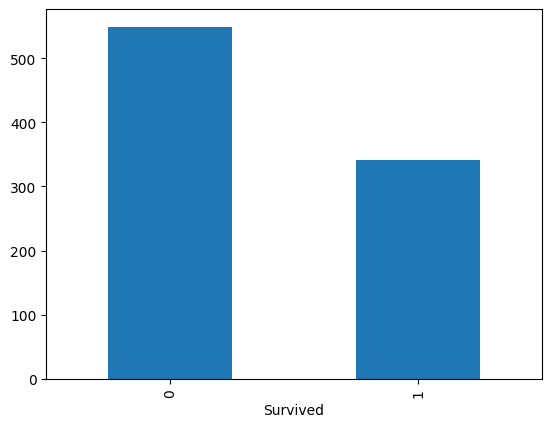

In [218]:
a.plot(kind  =  'bar')

##### create  pipeline

In [219]:
from  sklearn.pipeline import  Pipeline
from sklearn.preprocessing  import OneHotEncoder  , StandardScaler , OrdinalEncoder
from sklearn.impute  import SimpleImputer
from sklearn.compose  import ColumnTransformer

In [220]:
cat_pipeline1  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  =  'most_frequent')) ,  
                 ('encoder' ,  OrdinalEncoder())])
cat_pipeline2  = Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  = 'constant' , fill_value =  'not_Avail')) ,  
                 ('encoder' ,  OrdinalEncoder())]) 
num_pipeline  =  Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  =  'mean' )) , 
                ('scaler' ,  StandardScaler())])

In [221]:
cat1  =  ['Sex' , 'Ticket' ,  'Embarked']
cat2  = ['Cabin']


#### compose  all  pipelines

In [222]:
pre  =  ColumnTransformer([('cat1' , cat_pipeline1  ,  cat1 ) ,  
                       ('cat2' ,  cat_pipeline2 ,  cat2) ,  
                       ('num'  ,  num_pipeline  , num) ])

In [223]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [224]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

######  we faced  error  messege  of data type  
-  in  cat  column 'Ticket' some  obsn are  numerical
-  we have  to convert  in str 
-  used  below steps

In [225]:
x['Sex'].unique()

array(['male', 'female'], dtype=object)

In [226]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [227]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [228]:
Ticket  =  np.array(x['Ticket'] , dtype = 'str')

In [229]:
Ticket

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [230]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [231]:
x['Ticket'] = Ticket

In [232]:
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [233]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [234]:
#  apply  to data
x_scaled =  pre.fit_transform(x)

In [235]:
x_scaled =  x_scaled.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
x_scaled

array([[ 1.00000000e+00,  5.23000000e+02,  2.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01, -5.02445171e-01],
       [ 0.00000000e+00,  5.96000000e+02,  0.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01,  7.86845294e-01],
       [ 0.00000000e+00,  6.69000000e+02,  2.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.88854258e-01],
       ...,
       [ 0.00000000e+00,  6.75000000e+02,  2.00000000e+00, ...,
         4.32793366e-01,  2.00893337e+00, -1.76263239e-01],
       [ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.43810379e-02],
       [ 1.00000000e+00,  4.66000000e+02,  1.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.92377828e-01]],
      shape=(891, 9))

In [ ]:
##  male  , female 
1  ,  0  
0  , 1 

In [ ]:
#  convert  in dataframe
x_scaled =  pd.DataFrame(x_scaled)

In [ ]:
x_scaled

,0,1,2,3,4,5,6,7,8
0,1.0,523.0,2.0,147.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,0.0,596.0,0.0,81.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.0,669.0,2.0,147.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,0.0,49.0,2.0,55.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,1.0,472.0,2.0,147.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...
886,1.0,101.0,2.0,147.0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,0.0,14.0,2.0,30.0,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,0.0,675.0,2.0,147.0,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.0,8.0,0.0,60.0,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [ ]:
x.shape

(891, 9)

In [ ]:
x_scaled.shape

(891, 9)

In [ ]:
x_scaled.columns  =  pre.get_feature_names_out()

In [ ]:
x_scaled.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,1.0,523.0,2.0,147.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,0.0,596.0,0.0,81.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.0,669.0,2.0,147.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,0.0,49.0,2.0,55.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,1.0,472.0,2.0,147.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337


####  train test split

In [ ]:
from  sklearn.model_selection import  train_test_split

In [ ]:
x_train  ,  x_test  ,  y_train , y_test  =  train_test_split(x_scaled  ,  y ,  
                                            test_size  =  0.2  , 
                                             random_state  =  4)

In [ ]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


In [ ]:
x_train.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
42,1.0,391.0,0.0,147.0,0.827377,0.000000,-0.474545,-0.473674,-0.489442
684,1.0,240.0,2.0,147.0,-0.369365,2.331785,0.432793,0.767630,0.136831
605,1.0,396.0,2.0,147.0,0.827377,0.484880,0.432793,-0.473674,-0.335327
409,0.0,488.0,2.0,147.0,0.827377,0.000000,2.247470,0.767630,-0.135658
740,1.0,82.0,2.0,105.0,-1.566107,0.000000,-0.474545,-0.473674,-0.044381


In [ ]:
x_test.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
646,1.0,373.0,2.0,147.0,0.827377,-0.823344,-0.474545,-0.473674,-0.489442
876,1.0,504.0,2.0,147.0,0.827377,-0.746389,-0.474545,-0.473674,-0.450180
359,0.0,285.0,1.0,147.0,0.827377,0.000000,-0.474545,-0.473674,-0.489776
194,0.0,604.0,0.0,28.0,-1.566107,1.100515,-0.474545,-0.473674,-0.090272
819,1.0,337.0,2.0,147.0,0.827377,-1.515933,2.247470,2.008933,-0.086664


In [ ]:
y_train.head()

42     0
684    0
605    0
409    0
740    1
Name: Survived, dtype: int64

In [ ]:
y_test.head()

646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64

In [ ]:
###  model  fitting 
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
RF  =  RandomForestClassifier(n_estimators  =  50  ,
                      n_jobs  =  -1 , max_depth  =  6   )

In [ ]:
RF

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
RF.fit(x_train  ,  y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
RF.score(x_train  ,  y_train)

0.8820224719101124

In [ ]:
RF.score(x_test  , y_test)

0.8603351955307262

### hyperparameter  tunning technique

In [ ]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
para  =  {'n_estimators' :  (50 ,55 ,60  ,65  ,70 ,75) ,  
          'criterion' :  ['gini' ,  'entropy'] ,  
          'max_depth' :  range( 4 , 9 )}


In [ ]:
model  =  RandomForestClassifier()
RF_grcv  =  GridSearchCV(model  , param_grid  =  para , 
cv  =  5  ,  n_jobs  =  -1)

In [ ]:
RF_grcv.fit(x_train , y_train) 

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(4, 9), 'n_estimators': (50, ...)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,65


In [ ]:
 RF_grcv.score(x_train  , y_train)

0.9382022471910112

In [ ]:
RF_grcv.score(x_test  , y_test)

0.8715083798882681

In [ ]:
from  sklearn.metrics  import classification_report ,  confusion_matrix

####  training evaluation

In [ ]:
train_pred =  RF_grcv.predict(x_train)

In [ ]:
train_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
print(classification_report(y_train  ,  train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.95      0.89      0.92       282

    accuracy                           0.94       712
   macro avg       0.94      0.93      0.93       712
weighted avg       0.94      0.94      0.94       712



In [ ]:
cfm  =  confusion_matrix( y_train , train_pred )

<Axes: >

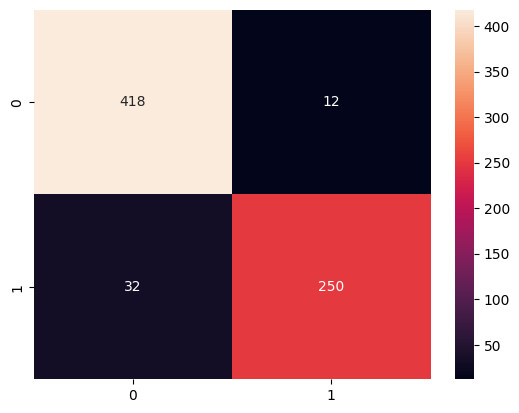

In [ ]:
sns.heatmap(cfm  ,  annot  =  True  ,  fmt  =  'd' ,  xticklabels=True  , yticklabels=True)

#### testing evaluation

In [ ]:
test_pred  =  RF_grcv.predict(x_test)


In [ ]:
print(classification_report(y_test  ,  test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       119
           1       0.86      0.73      0.79        60

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.87       179



In [ ]:
cfm_test  =  confusion_matrix(y_test  , test_pred)

<Axes: >

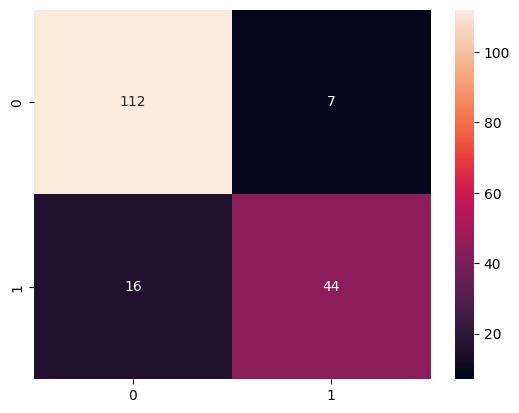

In [ ]:
sns.heatmap(cfm_test , annot  = True  , xticklabels= True  , yticklabels=True  , fmt  =  'd')

####  model  fitting on  boosting 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC  =  GradientBoostingClassifier( n_estimators=75 ,  max_depth=8 )

In [ ]:
GBC.fit(x_train  ,  y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,75
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,8
,min_impurity_decrease,0.0
,init,None


In [ ]:
GBC.score(x_train  ,  y_train)

0.9985955056179775

In [ ]:
GBC.score(x_test  ,  y_test)

0.8491620111731844

### evaluation



In [ ]:
train_pred  = GBC.predict(x_train)
test_pred  =  GBC.predict(x_test)

In [ ]:
print(classification_report(y_train  , train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       282

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [ ]:
cfm =  confusion_matrix(y_train  , train_pred)

<Axes: >

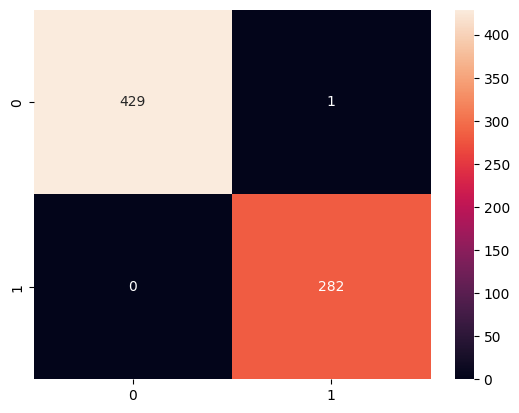

In [ ]:
sns.heatmap(cfm , annot  = True  ,
             xticklabels= True  ,
               yticklabels=True  ,
                 fmt  =  'd')

In [ ]:
print(classification_report(y_test  , test_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       119
           1       0.81      0.72      0.76        60

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



<Axes: >

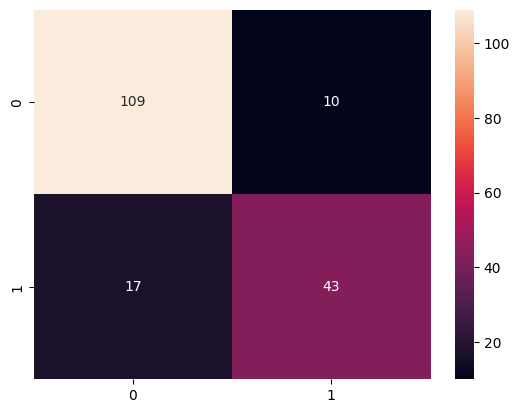

In [236]:
cfm_test  =  confusion_matrix(y_test  ,  test_pred)
sns.heatmap(cfm_test , annot  = True  ,
             xticklabels= True  ,
               yticklabels=True  , 
               fmt  =  'd')

#### XGBoost

In [90]:
%pip  install  xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.6/72.0 MB 13.1 MB/s eta 0:00:06
   -- ------------------------------------- 5.2/72.0 MB 11.5 MB/s eta 0:00:06
   ---- ----------------------------------- 7.9/72.0 MB 11.8 MB/s eta 0:00:06
   ----- ---------------------------------- 10.7/72.0 MB 11.5 MB/s eta 0:00:06
   ------- -------------------------------- 13.4/72.0 MB 11.8 MB/s eta 0:00:05
   -------- ------------------------------- 15.5/72.0 MB 11.5 MB/s eta 0:00:05
   ---------- ----------------------------- 18.6/72.0 MB 11.5 MB/s eta 0:00:05
   ------------ --------------------------- 22.0/72.0 MB 11.7 MB/s eta 0:00:05
   ------------- -------------------------- 24.6/72.0 MB 11.8 MB/s eta 0:00:05
   --------------- ------------------------ 27.5/72.0 MB 11.9 MB/s eta 0:00:04
   ---------------- ----------------------- 30.1/72.0 MB 11.8 MB/s eta 0:00:04
   ------------------ --------------------- 32.8/72.0 MB 11.8 MB


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [237]:
from xgboost  import XGBClassifier
XGB  = XGBClassifier(n_estimators = 85  , max_depth  =  9  ,  n_jobs =-1)


In [238]:
XGB.fit(x_train  ,  y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [239]:
XGB.score(x_train ,  y_train)


0.9971910112359551

In [240]:
XGB.score(x_test  , y_test)

0.8659217877094972

- from  above  all  models Extreme Gradient boosting  is  giving good  performance  we have  to  refer this  model  for  future predictions

#### Sample  prediction

In [242]:
path  =  r"D:\datasets\test_titanic.xlsx"

In [243]:
sample  =  pd.read_excel(path)

In [244]:
sample.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [245]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [246]:
Ticket  =  np.array(sample['Ticket'] ,  dtype  =  'str')

In [247]:
sample['Ticket'] =  Ticket

In [248]:
sample_scaled  =  pre.fit_transform(sample)

In [250]:
sample_scaled 

array([[ 1.00000000e+00,  1.52000000e+02,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.98407056e-01],
       [ 0.00000000e+00,  2.21000000e+02,  2.00000000e+00, ...,
         6.16992373e-01, -4.00247702e-01, -5.13274288e-01],
       [ 1.00000000e+00,  7.30000000e+01,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.65088464e-01],
       ...,
       [ 1.00000000e+00,  3.46000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -5.08791885e-01],
       [ 1.00000000e+00,  2.20000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.94448198e-01],
       [ 1.00000000e+00,  1.05000000e+02,  0.00000000e+00, ...,
         6.16992373e-01,  6.19895831e-01, -2.37905978e-01]],
      shape=(418, 9))

In [123]:
sample_scaled

array([[ 0.        ,  1.        ,  0.        , ..., -0.49947002,
        -0.4002477 , -0.49840706],
       [ 1.        ,  0.        ,  0.        , ...,  0.61699237,
        -0.4002477 , -0.51327429],
       [ 0.        ,  1.        ,  0.        , ..., -0.49947002,
        -0.4002477 , -0.46508846],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.49947002,
        -0.4002477 , -0.50879189],
       [ 0.        ,  1.        ,  0.        , ..., -0.49947002,
        -0.4002477 , -0.4944482 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.61699237,
         0.61989583, -0.23790598]], shape=(418, 450))

In [251]:
sample_scaled =  pd.DataFrame(sample_scaled  ,  columns  =  pre.get_feature_names_out())

In [252]:
sample.shape

(418, 11)

In [253]:
x_train.shape
sample_scaled.shape

(418, 9)

In [254]:
sample_scaled.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,1.0,152.0,1.0,76.0,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,0.0,221.0,2.0,76.0,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,1.0,73.0,1.0,76.0,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,1.0,147.0,2.0,76.0,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,0.0,138.0,2.0,76.0,0.873482,-0.655545,0.616992,0.619896,-0.418471


#### predict  target  values

In [255]:
GBC.predict(sample_scaled)

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,